# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# build url using base url + api key + units

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# build lists and for loop to print out cities 

city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1

for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    
    try:
        weather_response = requests.get(query_url + city).json()
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
        
    except:
        print("City not found: " + city)
        
print(len(weather_response))

processing Record 1 of Set 1 | dikson
processing Record 2 of Set 1 | mandalgovi
processing Record 3 of Set 1 | puri
processing Record 4 of Set 1 | mys shmidta
City not found: mys shmidta
processing Record 5 of Set 1 | georgetown
processing Record 6 of Set 1 | severo-yeniseyskiy
processing Record 7 of Set 1 | bluff
processing Record 8 of Set 1 | albany
processing Record 9 of Set 1 | bozuyuk
processing Record 10 of Set 1 | vilhena
processing Record 11 of Set 1 | yar-sale
processing Record 12 of Set 1 | cananeia
processing Record 13 of Set 1 | norman wells
processing Record 14 of Set 1 | constitucion
processing Record 15 of Set 1 | klyuchi
processing Record 16 of Set 1 | blagoyevo
processing Record 17 of Set 1 | belushya guba
City not found: belushya guba
processing Record 18 of Set 1 | easton
processing Record 19 of Set 1 | novobirilyussy
processing Record 20 of Set 1 | vardo
processing Record 21 of Set 1 | dingle
processing Record 22 of Set 1 | imbituba
processing Record 23 of Set 1 | b

processing Record 38 of Set 4 | orocue
processing Record 39 of Set 4 | tortoli
processing Record 40 of Set 4 | esperance
processing Record 41 of Set 4 | buribay
processing Record 42 of Set 4 | tiksi
processing Record 43 of Set 4 | marsa matruh
processing Record 44 of Set 4 | pevek
processing Record 45 of Set 4 | sankt florian
processing Record 46 of Set 4 | kaitangata
processing Record 47 of Set 4 | santa rosa
processing Record 48 of Set 4 | bacon
processing Record 49 of Set 4 | nejapa
processing Record 50 of Set 4 | mafinga
5
0
200
processing Record 1 of Set 5 | klaksvik
processing Record 2 of Set 5 | airai
processing Record 3 of Set 5 | halifax
processing Record 4 of Set 5 | yerofey pavlovich
processing Record 5 of Set 5 | dondo
processing Record 6 of Set 5 | faanui
processing Record 7 of Set 5 | nisia floresta
processing Record 8 of Set 5 | castro
processing Record 9 of Set 5 | yantongshan
processing Record 10 of Set 5 | general pico
processing Record 11 of Set 5 | daru
processing R

processing Record 25 of Set 8 | wamba
processing Record 26 of Set 8 | gasa
processing Record 27 of Set 8 | valle de allende
processing Record 28 of Set 8 | lasa
processing Record 29 of Set 8 | gujar khan
processing Record 30 of Set 8 | cidreira
processing Record 31 of Set 8 | puerto cabezas
processing Record 32 of Set 8 | tsiroanomandidy
processing Record 33 of Set 8 | tahta
processing Record 34 of Set 8 | naze
processing Record 35 of Set 8 | riyadh
processing Record 36 of Set 8 | saint-leu
processing Record 37 of Set 8 | mutsu
processing Record 38 of Set 8 | belmonte
processing Record 39 of Set 8 | yenagoa
processing Record 40 of Set 8 | digha
processing Record 41 of Set 8 | kaka
processing Record 42 of Set 8 | duz
City not found: duz
processing Record 43 of Set 8 | kousseri
processing Record 44 of Set 8 | anadyr
processing Record 45 of Set 8 | umm lajj
processing Record 46 of Set 8 | smithers
processing Record 47 of Set 8 | lebu
processing Record 48 of Set 8 | brenham
processing Reco

processing Record 14 of Set 12 | paamiut
processing Record 15 of Set 12 | camana
processing Record 16 of Set 12 | north bend
processing Record 17 of Set 12 | orono
processing Record 18 of Set 12 | huarmey
processing Record 19 of Set 12 | ambulu
processing Record 20 of Set 12 | road town
processing Record 21 of Set 12 | faenza
processing Record 22 of Set 12 | venado
processing Record 23 of Set 12 | bara
processing Record 24 of Set 12 | bilibino
processing Record 25 of Set 12 | nadym
processing Record 26 of Set 12 | zhob
processing Record 27 of Set 12 | rio cuarto
processing Record 28 of Set 12 | seoul
processing Record 29 of Set 12 | fairbanks
processing Record 30 of Set 12 | rorvik
processing Record 31 of Set 12 | sandovo
processing Record 32 of Set 12 | meulaboh
processing Record 33 of Set 12 | tidore
City not found: tidore
processing Record 34 of Set 12 | bargal
City not found: bargal
processing Record 35 of Set 12 | west plains
processing Record 36 of Set 12 | carquefou
processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create dataframe with cleaned up column names

weather_df = pd.DataFrame({"City": city_list,
                          "Latitude": lat_list,
                          "Longitude": lng_list,
                          "Max Temp": max_temp_list,
                          "Humidity": humidity_list,
                          "Cloudiness": cloudiness_list,
                          "Wind Speed (mph)": windspeed_list})
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed (mph)
0,Dikson,73.5069,80.5464,20.93,93,100,7.85
1,Mandalgovi,45.7625,106.2708,53.53,35,91,8.63
2,Puri,19.8000,85.8500,80.60,94,40,4.61
3,George Town,5.4112,100.3354,79.00,94,20,4.56
4,Severo-Yeniseyskiy,60.3725,93.0408,30.56,96,100,8.70
...,...,...,...,...,...,...,...
564,Zorgo,12.2489,-0.6158,94.06,30,65,4.54
565,Kidal,18.4411,1.4078,88.39,16,0,9.15
566,Peniche,39.3558,-9.3811,55.00,74,9,1.01
567,Krasnokamensk,50.0979,118.0369,47.77,38,100,13.56


In [10]:
# print stats - take note there is no humidity higher than 100%

weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed (mph)
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,21.175617,17.658676,61.480633,69.797891,52.193322,7.356872
std,32.913175,88.362215,18.604157,21.980535,37.264017,5.327864
min,-54.800000,-179.166700,14.000000,4.000000,0.000000,0.220000
25%,-5.550000,-63.572400,48.200000,59.000000,16.000000,3.440000
50%,26.184200,21.566700,64.800000,75.000000,54.000000,5.750000
75%,47.650000,95.321400,77.000000,87.000000,90.000000,10.360000
max,78.218600,179.316700,94.060000,100.000000,100.000000,37.980000


In [11]:
# output to csv file using aforementioned variable

weather_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

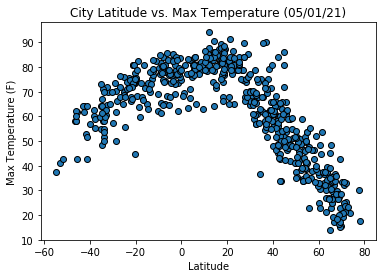

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], edgecolor="black", linewidths=1, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (05/01/21)")
plt.show()
plt.savefig("../output_data/max_temp.png")

## Latitude vs. Humidity Plot

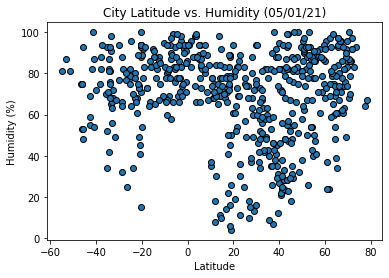

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolor="black", linewidths=1, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (05/01/21)")
plt.show()
plt.savefig("../output_data/humidity.png")

## Latitude vs. Cloudiness Plot

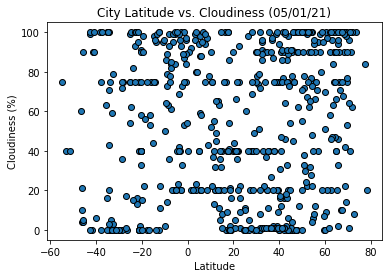

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (05/01/21)")
plt.show()
plt.savefig("../output_data/cloudiness.png")

## Latitude vs. Wind Speed Plot

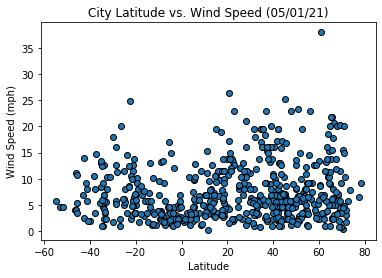

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], edgecolor="black", linewidths=1, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (05/01/21)")
plt.show()
plt.savefig("../output_data/wind_speed.png")

## Linear Regression

In [17]:
# create northern and southern hemisphere dataframes before plotting data

northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7993067550562308
The regression shows a negative correlation between max temp and latitude in the Northern Hemisphere.


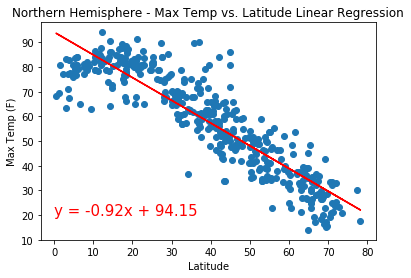

In [22]:
# print out the r-squared value along with the plot.

x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows a negative correlation between max temp and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5417240293371908
The regression shows a positive correlation between max temp and latitude in the Southern Hemisphere.


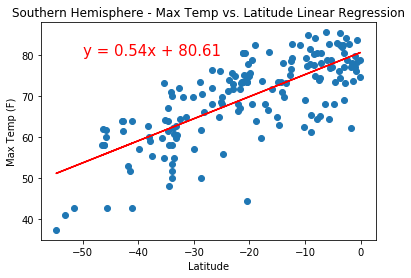

In [27]:
# print out the r-squared value along with the plot.

x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows a positive correlation between max temp and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01593012214334811
The regression shows no significant correlation between humidity and latitude in the Northern Hemisphere.


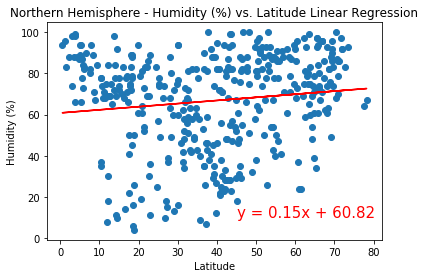

In [33]:
# print out the r-squared value along with the plot.

x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between humidity and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07242602636016825
The regression shows no significant correlation between humidity and latitude in the Southern Hemisphere.


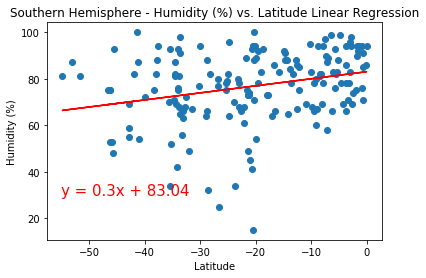

In [34]:
# print out the r-squared value along with the plot.

x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between humidity and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04554600645195923
The regression shows no significant correlation between cloudiness and latitude in the Northern Hemisphere.


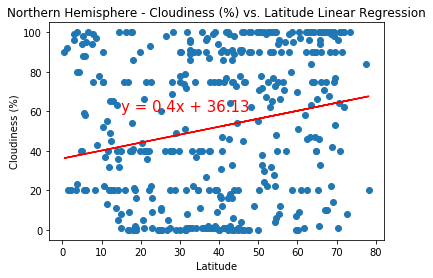

In [43]:
# print out the r-squared value along with the plot.

x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between cloudiness and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07416674914260378
The regression shows no significant correlation between cloudiness and latitude in the Southern Hemisphere.


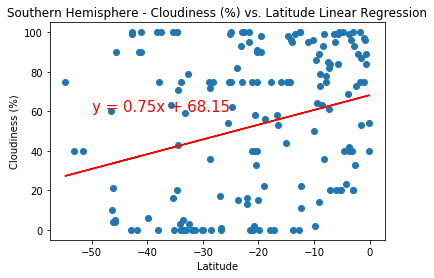

In [44]:
# print out the r-squared value along with the plot.

x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between cloudiness and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008760753473725912
The regression shows no significant correlation between wind speed and latitude in the Northern Hemisphere.


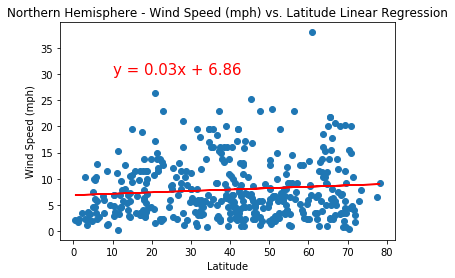

In [50]:
# print out the r-squared value along with the plot.

x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Wind Speed (mph)"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between wind speed and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06376165280119014
The regression shows no significant correlation between wind speed and latitude in the Southern Hemisphere.


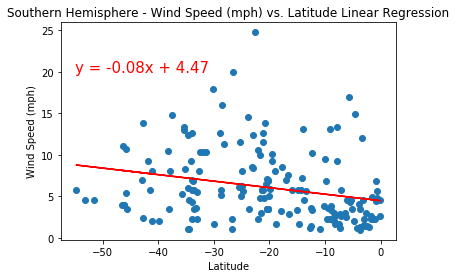

In [53]:
# print out the r-squared value along with the plot.

x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Wind Speed (mph)"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between wind speed and latitude in the Southern Hemisphere.")
plt.show()